# Imports

In [85]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

# Read data

In [86]:
df = pd.read_csv('../data/area_price.csv')

In [87]:
df.head()

,sqft_living,price
0,1340,313000.0
1,3650,2384000.0
2,1930,342000.0
3,2000,420000.0
4,1940,550000.0


# Data analysis

From the histogram and the scatterplot, we can see that there are some outliers.

<AxesSubplot:>

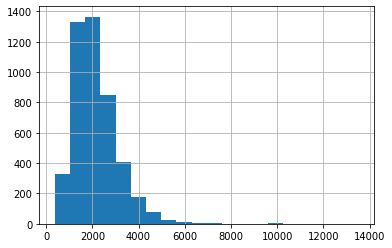

In [88]:
df['sqft_living'].hist(bins=20)

<AxesSubplot:>

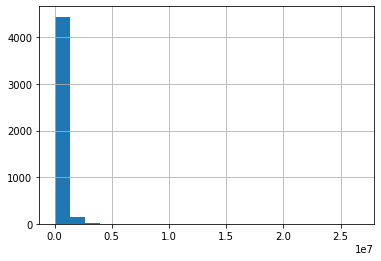

In [89]:
df['price'].hist(bins=20)

In [90]:
df.shape

(4600, 2)

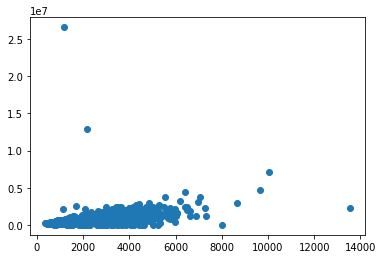

In [91]:
plt.scatter(df['sqft_living'].values, df['price'].values)

## Remove outliers

In [92]:
df = df[df['price'] < 10000000]

# Create train and test set

In [93]:
X = df['sqft_living']
y = df['price']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

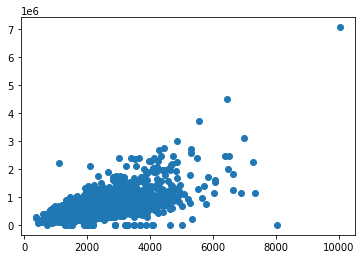

In [103]:
plt.scatter(X_train, y_train)

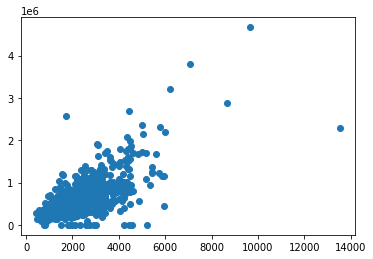

In [104]:
plt.scatter(X_test, y_test)

# Train a linear regression model

In [95]:
reg = LinearRegression()

In [96]:
reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

## Analyse model performance

### Scores

In [97]:
reg.score(X_train.reshape(-1, 1), y_train)

0.44102699967714465

In [98]:
reg.score(X_test.reshape(-1, 1), y_test)

0.4667145034686295

### The linear regression line

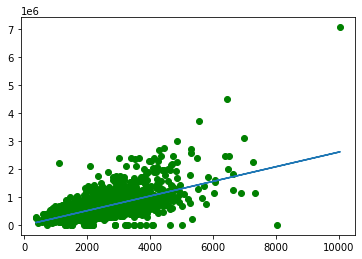

In [105]:
plt.scatter(X_train, y_train, c='g')
plt.plot(X_train, reg.predict(X_train.reshape(-1, 1)))

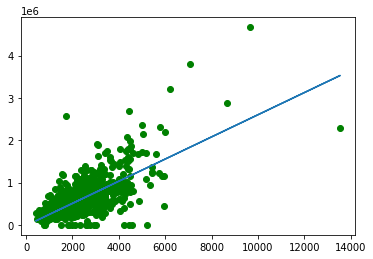

In [106]:
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, reg.predict(X_test.reshape(-1, 1)))

# Read data with more information

In [107]:
df = pd.read_csv('../data/house_price.csv')

In [108]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA


## Drop unwanted columns

In [109]:
X = df.drop(columns=['Unnamed: 0', 'price', 'city', 'statezip', 'country'])

In [110]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [111]:
y = df['price']

In [112]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

# Create train and test set

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
411,3.0,1.50,1500,6337,1.0,0,0,5,1500,0,1953,0
2367,4.0,2.25,2460,44431,1.0,0,0,4,2460,0,1957,2001
2025,4.0,3.25,3450,11240,2.0,0,3,4,2430,1020,1960,2001
2236,3.0,1.75,1520,8625,1.0,0,0,3,1520,0,1976,0
2559,4.0,2.75,2500,4950,2.0,0,0,3,2500,0,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,4.0,3.00,4260,18000,2.0,0,2,3,4260,0,2000,0
466,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007
3092,3.0,1.00,1150,8145,1.0,0,0,4,990,160,1932,1958
3772,2.0,1.00,910,2002,1.5,0,0,3,910,0,1900,2005


# Train a linear regression model

In [115]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Score

In [116]:
reg.score(X_train, y_train)

0.5326944751378839

In [117]:
reg.score(X_test, y_test)

0.5146497113381427

## coefficients

In [118]:
reg.coef_

array([-5.68301931e+04,  3.03928374e+04,  1.80340731e+02, -6.33120417e-01,
        6.31027614e+04,  4.53038851e+05,  5.09962148e+04,  2.10087586e+04,
        1.02714740e+02,  7.76259904e+01, -2.71891579e+03,  2.51767387e+00])

In [119]:
reg.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'], dtype=object)

## Input correlations

In [120]:
corr = X.corr()

In [121]:
corr.style.background_gradient(cmap='coolwarm')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,1.000000,0.545978,0.594883,0.068795,0.177755,-0.003499,0.110976,0.025098,0.484658,0.334217,0.142500,-0.061061
bathrooms,0.545978,1.000000,0.761206,0.107841,0.486583,0.076238,0.211985,-0.119913,0.689982,0.297962,0.463626,-0.216094
sqft_living,0.594883,0.761206,1.000000,0.210521,0.344760,0.117611,0.310986,-0.062657,0.876443,0.447146,0.287990,-0.123052
sqft_lot,0.068795,0.107841,0.210521,1.000000,0.003690,0.017236,0.073889,0.000579,0.216433,0.034832,0.050731,-0.022746
floors,0.177755,0.486583,0.344760,0.003690,1.000000,0.021993,0.031090,-0.275071,0.522733,-0.255580,0.467656,-0.234016
waterfront,-0.003499,0.076238,0.117611,0.017236,0.021993,1.000000,0.360931,0.000355,0.078897,0.097512,-0.023561,0.008634
view,0.110976,0.211985,0.310986,0.073889,0.031090,0.360931,1.000000,0.063096,0.174271,0.321644,-0.064457,0.022999
condition,0.025098,-0.119913,-0.062657,0.000579,-0.275071,0.000355,0.063096,1.000000,-0.178145,0.200898,-0.399977,-0.186563
sqft_above,0.484658,0.689982,0.876443,0.216433,0.522733,0.078897,0.174271,-0.178145,1.000000,-0.038790,0.408680,-0.160525
sqft_basement,0.334217,0.297962,0.447146,0.034832,-0.255580,0.097512,0.321644,0.200898,-0.038790,1.000000,-0.161524,0.042832
